In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
data = pd.read_csv("diabetes_data.csv")

In [3]:
data.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Label
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [4]:
data.columns.str.lower().str.replace(' ', '_')

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'label'],
      dtype='object')

In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [6]:
data.head(5)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,label
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  label               520 non-null    int64
dt

In [8]:
data.isna().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
label                 0
dtype: int64

In [9]:
data.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,label
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.dtypes

age                   int64
gender                int64
polyuria              int64
polydipsia            int64
sudden_weight_loss    int64
weakness              int64
polyphagia            int64
genital_thrush        int64
visual_blurring       int64
itching               int64
irritability          int64
delayed_healing       int64
partial_paresis       int64
muscle_stiffness      int64
alopecia              int64
obesity               int64
label                 int64
dtype: object

In [11]:
data.count()

age                   520
gender                520
polyuria              520
polydipsia            520
sudden_weight_loss    520
weakness              520
polyphagia            520
genital_thrush        520
visual_blurring       520
itching               520
irritability          520
delayed_healing       520
partial_paresis       520
muscle_stiffness      520
alopecia              520
obesity               520
label                 520
dtype: int64

In [12]:
data.shape

(520, 17)

In [13]:
data['label'].value_counts()

1    320
0    200
Name: label, dtype: int64

#### Narrative
1 = Positive
0 = Negative

in label which is our target.

In [14]:
target_label = {'Positive':1, 'Negative':0}

<AxesSubplot:>

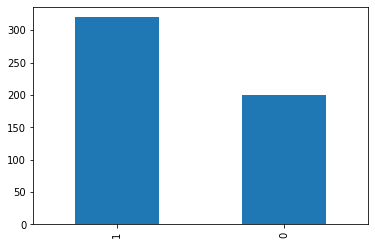

In [15]:
#Plotting count values of Positive and Negative

data['label'].value_counts().plot(kind = 'bar')

In [16]:
data['gender'].value_counts()

1    328
0    192
Name: gender, dtype: int64

#### Narrative
1 = Male
0 = Female

in gender.

<AxesSubplot:>

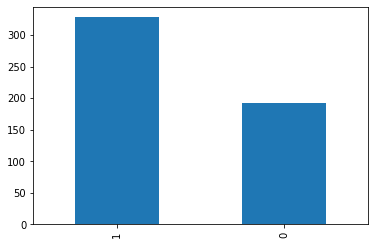

In [17]:
data['gender'].value_counts().plot(kind = 'bar')

In [18]:
data.groupby(['age', 'gender']).size()

age  gender
16   1         1
25   0         1
     1         1
26   1         1
27   1         6
              ..
70   1         5
72   1         9
79   1         1
85   1         2
90   0         2
Length: 82, dtype: int64

### freuqency distribution table using the age range




In [19]:
data['age'].max()

90

In [20]:
data['age'].min()

16

In [21]:
labels = ["Less than 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60",
         "60 to 70", "70 to 80", "80 to 90"]

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

freq_data = data.groupby(pd.cut(data['age'], bins=bins, labels=labels)).size()

In [22]:
freq_data

age
Less than 20      1
20 to 30         44
30 to 40        123
40 to 50        145
50 to 60        127
60 to 70         66
70 to 80         10
80 to 90          4
dtype: int64

In [23]:
freq_data = freq_data.reset_index(name='count')

In [24]:
freq_data

,age,count
0,Less than 20,1
1,20 to 30,44
2,30 to 40,123
3,40 to 50,145
4,50 to 60,127
5,60 to 70,66
6,70 to 80,10
7,80 to 90,4


<AxesSubplot:>

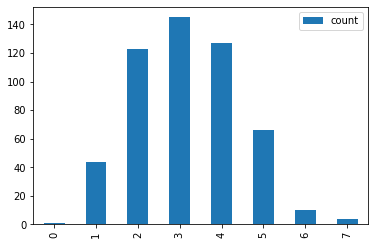

In [25]:
freq_data.plot(kind = 'bar')

<AxesSubplot:>

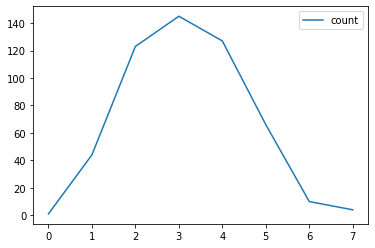

In [26]:
freq_data.plot(kind = 'line')

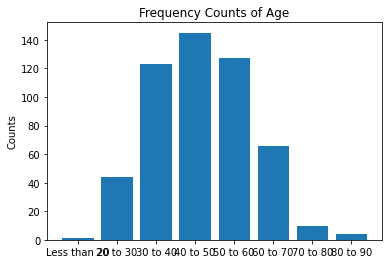

In [27]:
plt.bar(freq_data['age'], freq_data['count'])
plt.ylabel('Counts')
plt.title('Frequency Counts of Age')
plt.show()

In [28]:
#check and detect outliers

+ univariate and multivariate analysis
+ using box plot for univariate
+ using scatterplot for multivariate
+ using z-score
+ using IQT

/home/sonu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

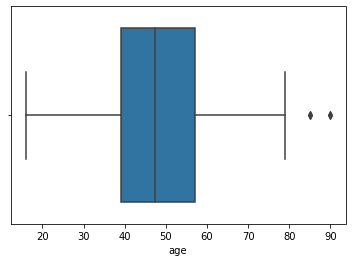

In [29]:
#using bocplot for univariate
sns.boxplot(data['age'])

#### we can see couple of outliers in 80-90 age range

In [30]:
data[data['age'] == 90]

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,label
102,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1
186,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1


In [31]:
#scatter for multi vraiables outlier detection

/home/sonu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='delayed_healing'>

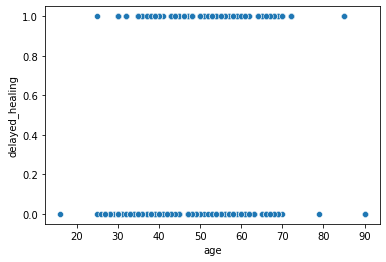

In [32]:
sns.scatterplot(data['age'], data['delayed_healing'])

### Feature Engineering

+ SelectKbest: to fin out the best features having the strong relationship with our target/output
+ Recursive feature elimination
+ Ranking best mechanism

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
#features and labels

In [35]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'label'],
      dtype='object')

In [36]:
xfeatures = data[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']]

ylabels = data['label']

In [37]:
#using skbest
skb = SelectKBest(score_func=chi2, k=12)
best_feature = skb.fit(xfeatures,ylabels)

In [38]:
#highest score meaning better features
print("Score", best_feature.scores_)

Score [1.88457668e+01 3.87476372e+01 1.16184593e+02 1.20785515e+02
 5.77493088e+01 1.27242623e+01 3.31984177e+01 4.91400862e+00
 1.81245708e+01 4.78260870e-02 3.53341270e+01 6.20188285e-01
 5.53142857e+01 4.87500000e+00 2.44027933e+01 2.25028409e+00]


In [39]:
best_feature_fit = best_feature.transform(xfeatures)

In [40]:
best_feature_fit

array([[40,  1,  0, ...,  0,  0,  1],
       [58,  1,  0, ...,  0,  1,  1],
       [41,  1,  1, ...,  0,  0,  1],
       ...,
       [58,  0,  1, ...,  0,  1,  0],
       [32,  0,  0, ...,  0,  0,  1],
       [42,  1,  0, ...,  0,  0,  0]])

In [41]:
#mapping to features name
feature_score = pd.DataFrame(best_feature.scores_, columns=['Feature Scores'])

In [42]:
feature_score

,Feature Scores
0,18.845767
1,38.747637
2,116.184593
3,120.785515
4,57.749309
5,12.724262
6,33.198418
7,4.914009
8,18.124571
9,0.047826


In [43]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns=['feature_name'])
best_feature_dataframe = pd.concat([feature_score, feature_column_names], axis =1)

In [44]:
best_feature_dataframe

,Feature Scores,feature_name
0,18.845767,age
1,38.747637,gender
2,116.184593,polyuria
3,120.785515,polydipsia
4,57.749309,sudden_weight_loss
5,12.724262,weakness
6,33.198418,polyphagia
7,4.914009,genital_thrush
8,18.124571,visual_blurring
9,0.047826,itching


In [45]:
#get the best among them from higher scores

In [46]:
best_feature_dataframe.nlargest(12, 'Feature Scores')

,Feature Scores,feature_name
3,120.785515,polydipsia
2,116.184593,polyuria
4,57.749309,sudden_weight_loss
12,55.314286,partial_paresis
1,38.747637,gender
10,35.334127,irritability
6,33.198418,polyphagia
14,24.402793,alopecia
0,18.845767,age
8,18.124571,visual_blurring


### checking for feature importance
+ extra tree classifier

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier()

In [49]:
#print important 
print(et_clf.feature_importances_)

[0.04925741 0.10118043 0.22088675 0.21240954 0.05945995 0.02107085
 0.02768044 0.02362359 0.03335622 0.03216483 0.04342268 0.03538813
 0.0531466  0.02761899 0.03881635 0.02051725]


In [50]:
feature_importance_dataframe = pd.Series(et_clf.feature_importances_, index=xfeatures.columns)

In [51]:
feature_importance_dataframe

age                   0.049257
gender                0.101180
polyuria              0.220887
polydipsia            0.212410
sudden_weight_loss    0.059460
weakness              0.021071
polyphagia            0.027680
genital_thrush        0.023624
visual_blurring       0.033356
itching               0.032165
irritability          0.043423
delayed_healing       0.035388
partial_paresis       0.053147
muscle_stiffness      0.027619
alopecia              0.038816
obesity               0.020517
dtype: float64

<AxesSubplot:>

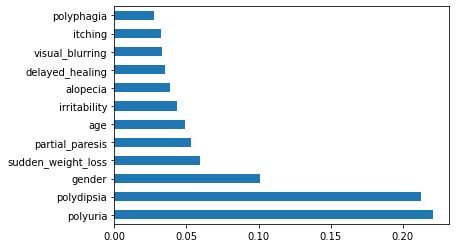

In [52]:
feature_importance_dataframe.nlargest(12).plot(kind = 'barh')

In [53]:
data.corr()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,label
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


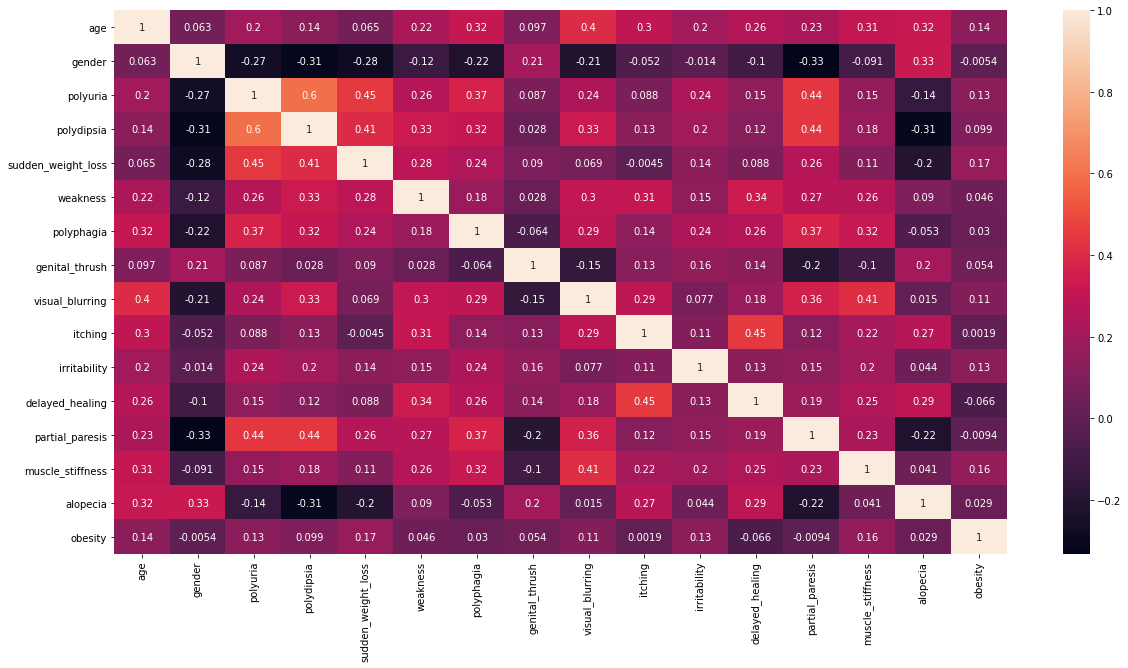

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(), annot=True)
plt.show()

## Building Model

+ Logistic Regression
+ Random Forests
+ Decision Tree

In [55]:
xfeatures

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [56]:
ylabels

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: label, Length: 520, dtype: int64

In [57]:
# for selected best features
best_feature_dataframe.nlargest(12, 'Feature Scores')

,Feature Scores,feature_name
3,120.785515,polydipsia
2,116.184593,polyuria
4,57.749309,sudden_weight_loss
12,55.314286,partial_paresis
1,38.747637,gender
10,35.334127,irritability
6,33.198418,polyphagia
14,24.402793,alopecia
0,18.845767,age
8,18.124571,visual_blurring


In [58]:
type(best_feature_dataframe.nlargest(12, 'Feature Scores'))

pandas.core.frame.DataFrame

In [59]:
best_feature_dataframe.nlargest(12, 'Feature Scores')['feature_name']

3             polydipsia
2               polyuria
4     sudden_weight_loss
12       partial_paresis
1                 gender
10          irritability
6             polyphagia
14              alopecia
0                    age
8        visual_blurring
5               weakness
7         genital_thrush
Name: feature_name, dtype: object

In [60]:
best_feature_dataframe.nlargest(12, 'Feature Scores')['feature_name'].unique()

array(['polydipsia', 'polyuria', 'sudden_weight_loss', 'partial_paresis',
       'gender', 'irritability', 'polyphagia', 'alopecia', 'age',
       'visual_blurring', 'weakness', 'genital_thrush'], dtype=object)

In [61]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'label'],
      dtype='object')

In [62]:
xfeatures_best = data[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss','weakness', 'polyphagia', 'genital_thrush', 'visual_blurring','irritability','partial_paresis','alopecia']]

In [63]:
xfeatures_best

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,irritability,partial_paresis,alopecia
0,40,1,0,1,0,1,0,0,0,0,0,1
1,58,1,0,0,0,1,0,0,1,0,1,1
2,41,1,1,0,0,1,1,0,0,0,0,1
3,45,1,0,0,1,1,1,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,0,1,0
516,48,0,1,1,1,1,1,0,0,1,1,0
517,58,0,1,1,1,1,1,0,1,0,1,0
518,32,0,0,0,0,1,0,0,1,0,0,1


In [64]:
x_train, x_test, y_train, y_test = train_test_split(xfeatures_best, ylabels, test_size=0.25, random_state=42)

In [83]:
logreg = LogisticRegression()
model_logit = logreg.fit(x_train, y_train)


In [84]:
model_logit.score(x_test, y_test)

0.9230769230769231

In [85]:
#method 2
model_logit.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [68]:
print(list(y_test))

[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]


In [86]:
accuracy_score(y_test, model_logit.predict(x_test))

0.9230769230769231

In [70]:
x_test.iloc[1]

age                   40
gender                 0
polyuria               1
polydipsia             1
sudden_weight_loss     0
weakness               1
polyphagia             1
genital_thrush         0
visual_blurring        0
irritability           0
partial_paresis        1
alopecia               0
Name: 93, dtype: int64

In [71]:
result_dic = {"Positive": 1, "Negative": 0}
x1 = x_test.iloc[1]

In [87]:
model_logit.predict(np.array(x1).reshape(1, -1))

array([1])

## Wow, correct so far. Looks good!!

In [73]:
#Decision Tree

In [88]:
clf = DecisionTreeClassifier()
model_tree = clf.fit(x_train, y_train)

In [90]:
model_tree.score(x_test, y_test)

0.9538461538461539

In [76]:
#KNN Algorithm

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=4)

In [91]:
model_knn = knn.fit(x_train, y_train)

In [92]:
model_knn.score(x_test, y_test)

0.8538461538461538

### save our models 
+ pickle
+ joblib
+ json etc

In [81]:
#using joblib
import joblib

In [82]:
model_file = open("logistic_regression_model.pkl", "wb")

In [93]:
joblib.dump(model_logit, model_file)
model_file.close()

In [94]:
model_file_tree = open("decision_tree_model.pkl", "wb")
joblib.dump(model_tree, model_file_tree)
model_file_tree.close()

In [95]:
model_file_knn = open("knn_model.pkl", "wb")
joblib.dump(model_knn, model_file_knn)
model_file_knn.close()

## Create decision tree plot

In [97]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [99]:
xfeatures_best.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'irritability', 'partial_paresis', 'alopecia'],
      dtype='object')

In [100]:
features_name_best = xfeatures_best.columns

In [101]:
target_names = ["Positive", "Negative"]

In [102]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features_name_best, class_names=target_names)

In [103]:
graph = pydotplus.graph_from_dot_data(dot_data)

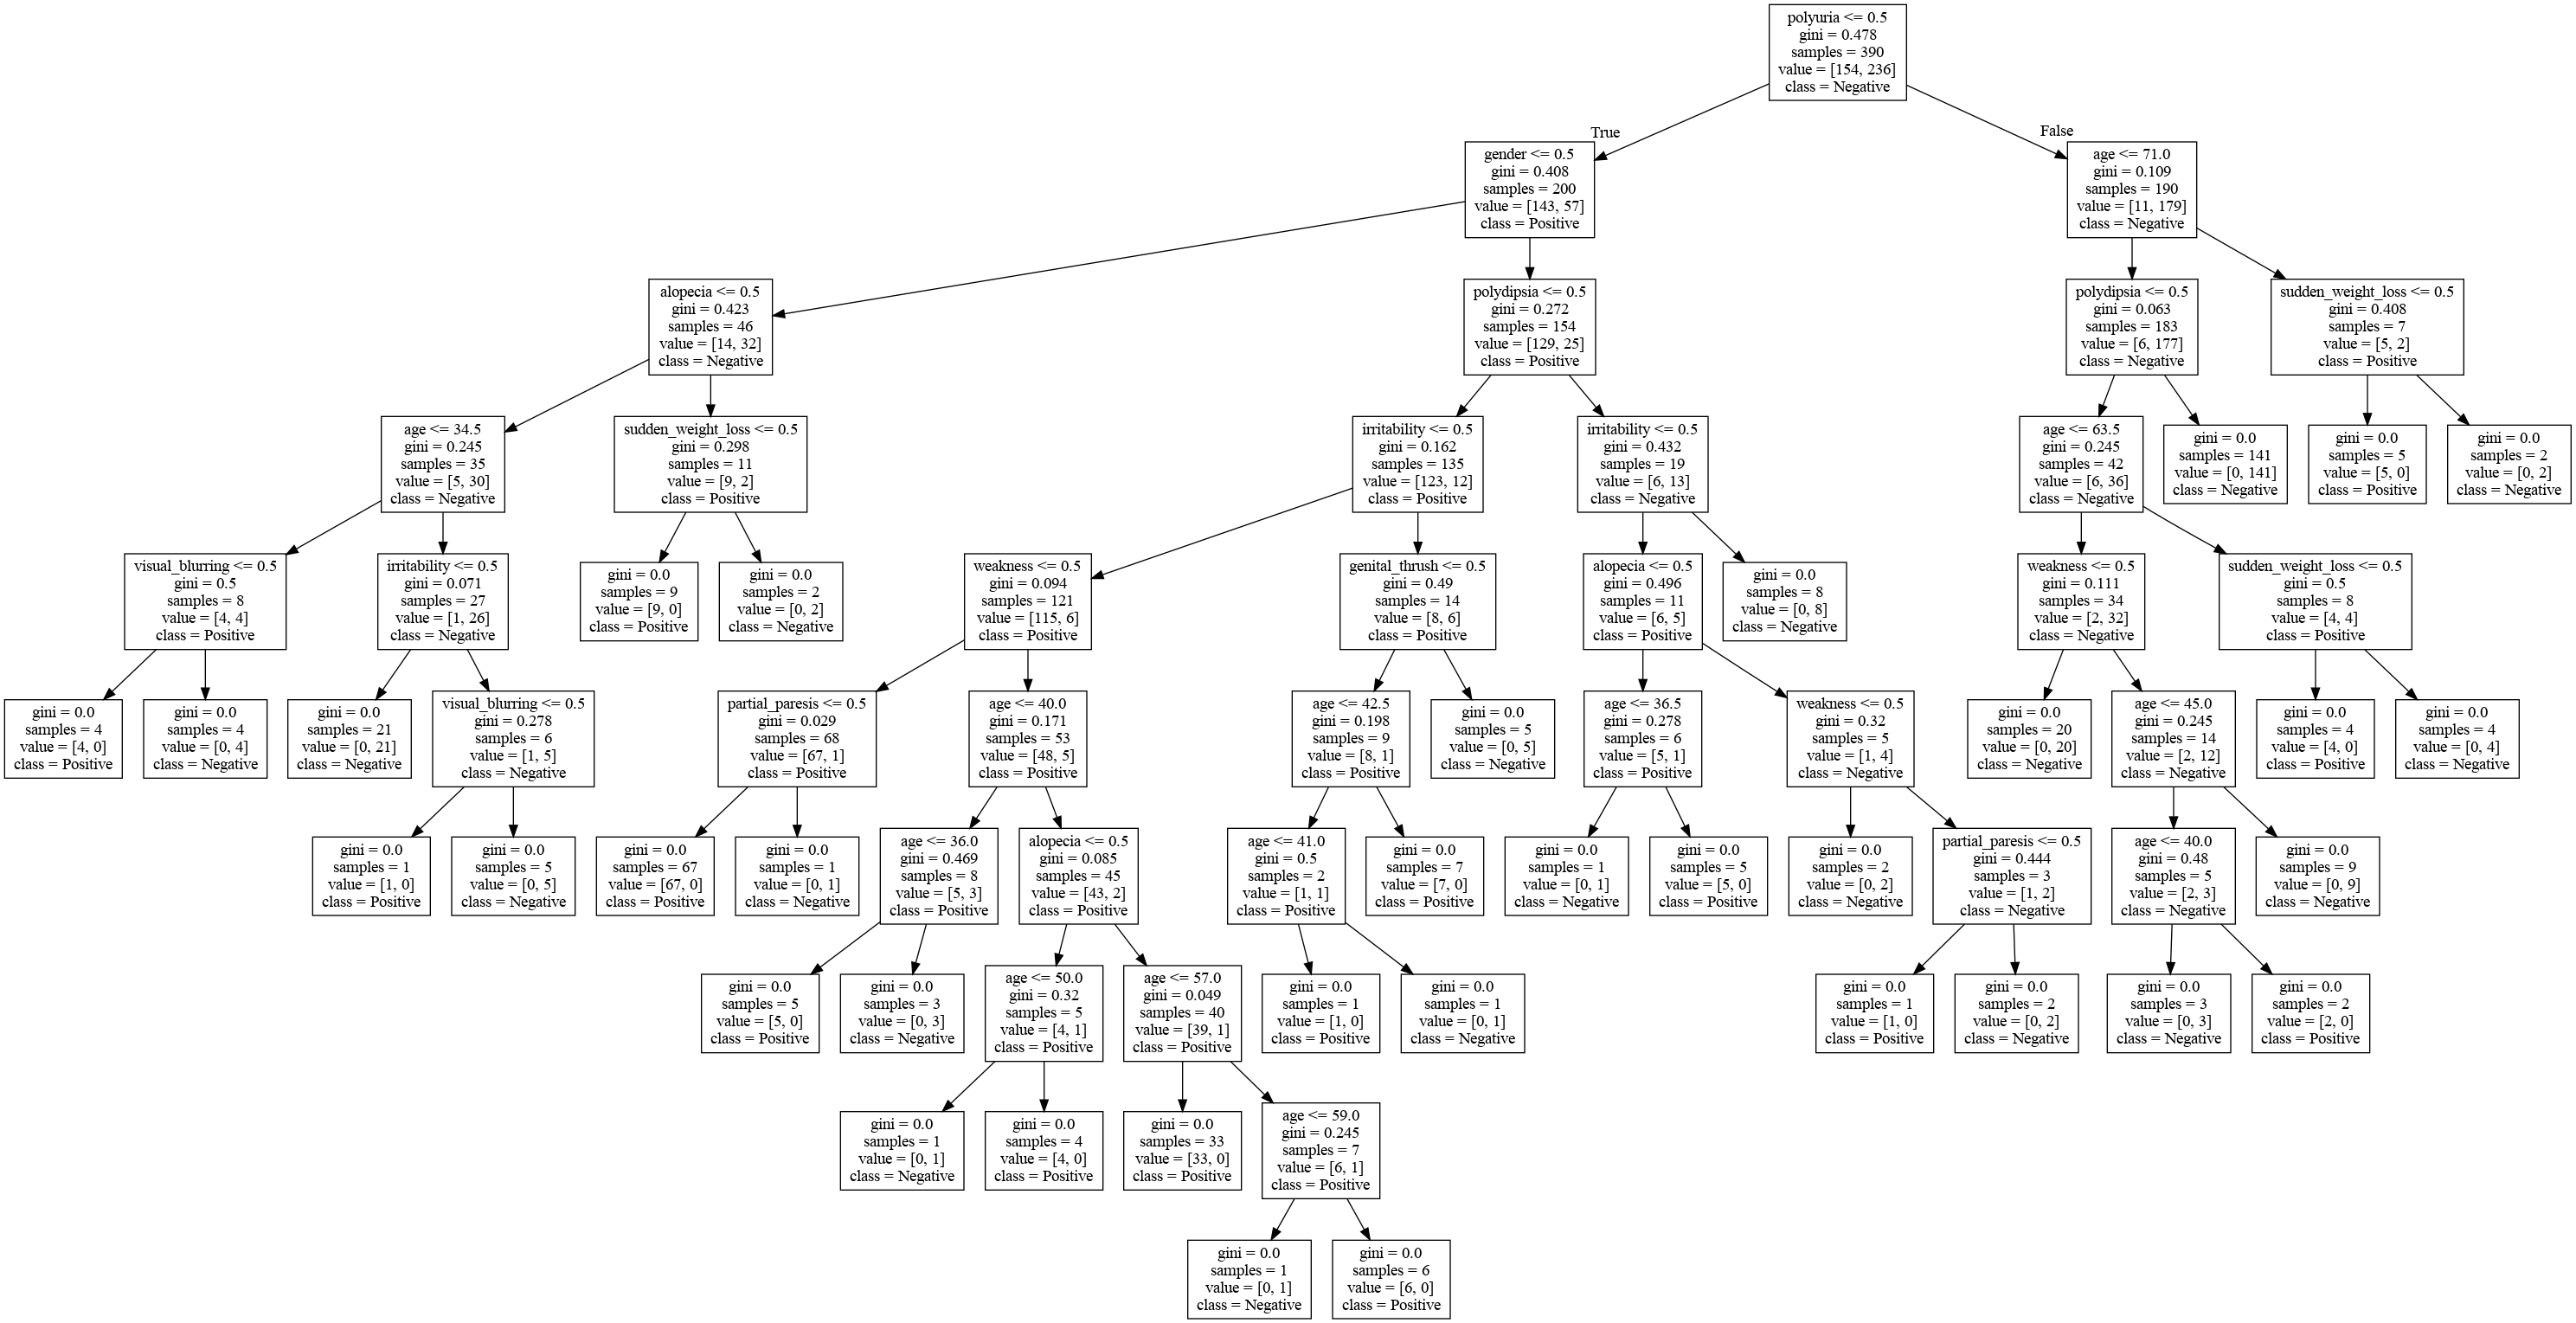

In [104]:
Image(graph.create_png())

In [105]:
#save the image
graph.write_png("decision_tree_plot.png")

True

## Interpret and Evaluate
+ Eli5
+ Lime
+ SHAP
+ Skater

In [108]:
#using Lime for Interpreting
import lime
import lime.lime_tabular

In [109]:
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

In [110]:
#create lime explainer using table, testexplainer, image explainer


In [112]:
features_name_best

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'irritability', 'partial_paresis', 'alopecia'],
      dtype='object')

In [113]:
target_names

['Positive', 'Negative']

In [165]:
class_names = ["Negative(0)", "Positive(1)"]

In [166]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,
                                                   feature_names=features_name_best,
                                                   class_names=class_names,discretize_continuous=True)

In [167]:
x1

age                   40
gender                 0
polyuria               1
polydipsia             1
sudden_weight_loss     0
weakness               1
polyphagia             1
genital_thrush         0
visual_blurring        0
irritability           0
partial_paresis        1
alopecia               0
Name: 93, dtype: int64

In [168]:
x_test.iloc[1]

age                   40
gender                 0
polyuria               1
polydipsia             1
sudden_weight_loss     0
weakness               1
polyphagia             1
genital_thrush         0
visual_blurring        0
irritability           0
partial_paresis        1
alopecia               0
Name: 93, dtype: int64

In [169]:
x_test.iloc[54]

age                   37
gender                 1
polyuria               0
polydipsia             0
sudden_weight_loss     0
weakness               0
polyphagia             0
genital_thrush         0
visual_blurring        0
irritability           0
partial_paresis        0
alopecia               0
Name: 349, dtype: int64

In [170]:
model_tree.predict(np.array(x_test.iloc[54]).reshape(1,-1))

array([0])

In [171]:
model_tree.predict(np.array(x_test.iloc[1]).reshape(1,-1))

array([1])

In [172]:
exp = explainer.explain_instance(x_test.iloc[54], model_tree.predict_proba, num_features=12, top_labels=1)

In [173]:
exp.show_in_notebook(show_table = True, show_all = False)

## Evaluation

In [177]:
y_pred = model_tree.predict(x_test)

In [178]:
accuracy_score(y_test, y_pred)

0.9538461538461539

In [180]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[44,  2],
       [ 4, 80]])

In [181]:
#plot
from sklearn.metrics import plot_confusion_matrix

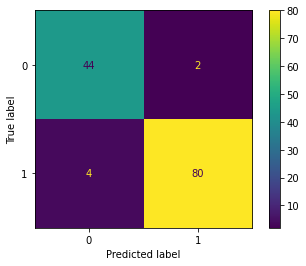

In [183]:
plot_confusion_matrix(model_tree,x_test,y_test)

In [185]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 Negative(0)       0.92      0.96      0.94        46
 Positive(1)       0.98      0.95      0.96        84

    accuracy                           0.95       130
   macro avg       0.95      0.95      0.95       130
weighted avg       0.95      0.95      0.95       130

